In [53]:
from functools import reduce
from itertools import combinations
def Lk(list_xy,k):
    list_x=[str(i[0]) for i in list_xy]
    den=1; coef=[]
    for i in range (len(list_xy)):
        if i!=k:#denominator
            den*=(list_xy[k][0]-list_xy[i][0])
        if i>0:#numerator
            comb=list_x[:k]
            if k!=len(list_xy)-1:
                comb.extend(list_x[k+1:])
            comb=list(combinations(','.join(comb).split(','), i))
            comb=[reduce(lambda x,y:(int(x)*int(y)), comb[j]) for j in range (len(comb))] if i!=1 else [int(x[0]) for x in comb]
            coef.insert(0,sum(comb))
    coef.append(1)
    coef=coef[::-1]
    coef=[coef[i]/den*(-1)**(i)*list_xy[k][1] for i in range (len(coef))]
    return (coef[::-1])


In [54]:
def F(list_xy):
    ans=[]
    for i in Lk(list_xy, 0):
        ans.append(i)
    for k in range(1,len(list_xy)):
        for i in range(len(ans)):
            ans[i]+=Lk(list_xy,k)[i]
    return ans


In [94]:
def quantum(am, begin=0):
    return [[x,1/(25*x**2+1)] for x in range(begin, begin+am)]

In [95]:
begin=-5
length=11
lastofus=quantum(length,begin)
print(lastofus)

InterPol=F(lastofus)
print(InterPol)
ans=[[],[]]
k=53
for i in range(k):
    x=begin+length/k*i
    ans[0].append(x)
    y=0
    for j in range(len(InterPol)):
        y += x**j*InterPol[j] 
    ans[1].append(y)
    

[[-5, 0.001597444089456869], [-4, 0.0024937655860349127], [-3, 0.004424778761061947], [-2, 0.009900990099009901], [-1, 0.038461538461538464], [0, 1.0], [1, 0.038461538461538464], [2, 0.009900990099009901], [3, 0.004424778761061947], [4, 0.0024937655860349127], [5, 0.001597444089456869]]
[1.0, 4.925496588283756e-19, -1.4017022018886478, -3.407190030330423e-19, 0.5038241865915479, -1.3700757921838308e-19, -0.06720281294416733, 8.126222337720944e-21, 0.0036079175300223576, 5.914341379754148e-23, -6.555082721697597e-05]


In [96]:
%matplotlib notebook


<IPython.core.display.Javascript object>


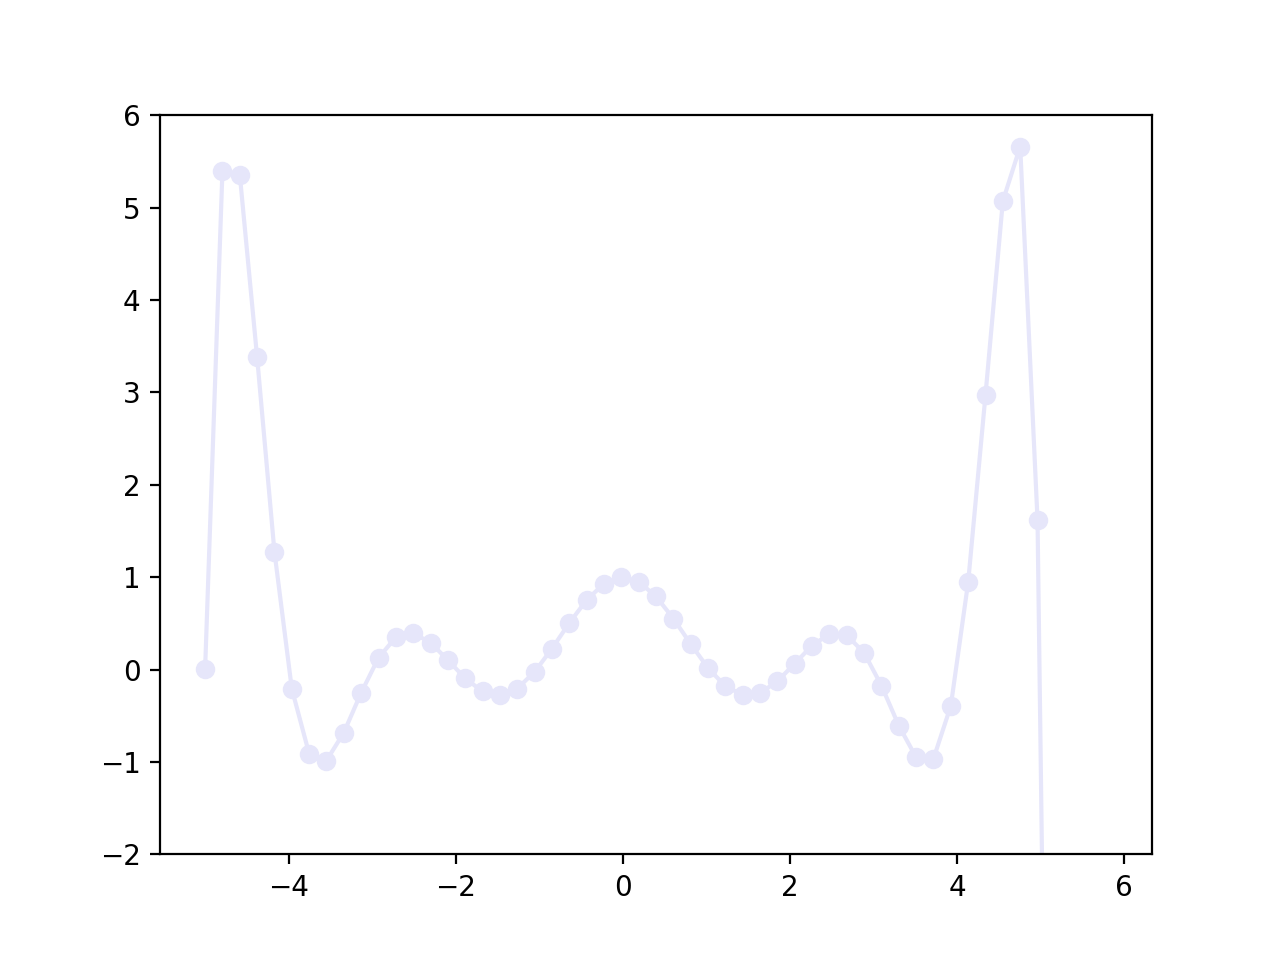

In [100]:
import matplotlib.pyplot as plt
plt.ylim(-2,6)
plt.plot(ans[0],ans[1], 'o-', color='lavender')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ans[0],ans[1], '-', color='lavender')
plt.show()